<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/PraktikumMandiri13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
kaggle = '/content/kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.74GB/s]


In [ ]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok= True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [ ]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [ ]:
len(data_0)

2236

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os

In [ ]:
dataset_path = '/content/dataset'

X = []
y = []

for label in range(10):
    folder_path = os.path.join(dataset_path, str(label))
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)

        # Buka gambar
        img = Image.open(img_path).convert('L')   # grayscale
        img = img.resize((28, 28))                 # resize ke 28x28
        img = np.array(img)

        X.append(img)
        y.append(label)

In [ ]:
X = np.array(X)
y = np.array(y)

print(X.shape)  # (jumlah_data, 28, 28)
print(y.shape)

(21555, 28, 28)
(21555,)


In [ ]:
# Normalisasi Data
X = X / 255.0

In [ ]:
# Mengubah Data Gambar Menjadi Numerik (Flatten)
X = X.reshape(X.shape[0], 28 * 28)

In [ ]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
# One-Hot Encoding Label
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

In [ ]:
# Membangun Model MLP (ANN)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training Model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1164 - loss: 2.3433 - val_accuracy: 0.2131 - val_loss: 2.2519
Epoch 2/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1834 - loss: 2.2157 - val_accuracy: 0.1424 - val_loss: 2.3746
Epoch 3/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2462 - loss: 2.0892 - val_accuracy: 0.2696 - val_loss: 1.9766
Epoch 4/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3235 - loss: 1.9168 - val_accuracy: 0.3720 - val_loss: 1.8413
Epoch 5/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3625 - loss: 1.8327 - val_accuracy: 0.2728 - val_loss: 2.0702
Epoch 6/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3799 - loss: 1.8195 - val_accuracy: 0.4503 - val_loss: 1.7204
Epoch 7/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4107 - loss: 1.7272 - val_accuracy: 0.4123 - val_loss: 1.7620
Epoch 8/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4415 - loss: 1.6915 - val_accuracy: 0.

In [ ]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4096 - loss: 1.7097
Test Accuracy: 0.4272790551185608


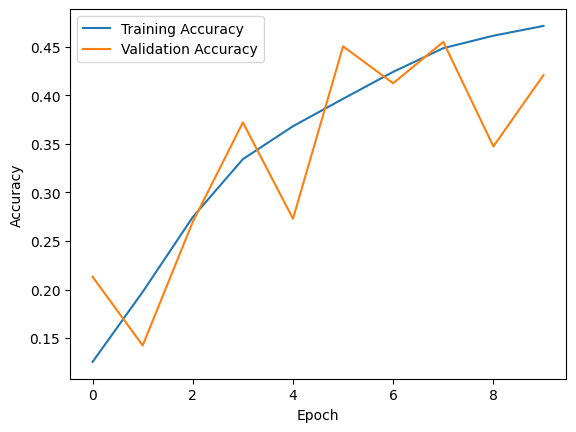

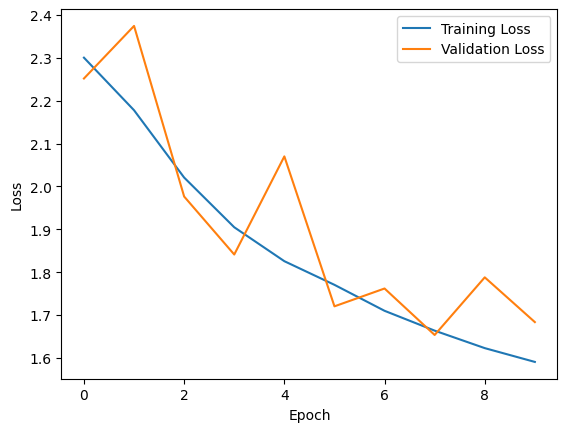

In [ ]:
# Visualisasi Akurasi & Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


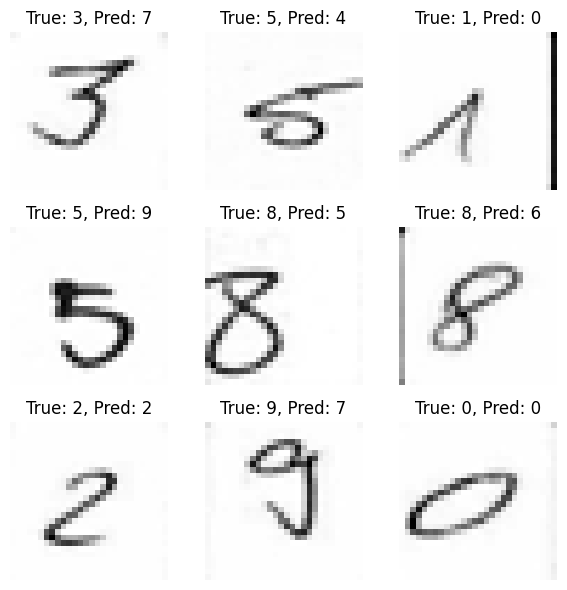

In [ ]:
# Prediksi Contoh Data
predictions = model.predict(X_test)

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

[array([[0.99607843, 0.99607843, 0.99607843, ..., 0.97254902, 0.94509804,
         0.94901961],
        [1.        , 1.        , 0.99607843, ..., 0.99215686, 0.99215686,
         0.98823529],
        [0.7254902 , 0.96078431, 0.97647059, ..., 0.99607843, 0.99607843,
         0.99215686],
        ...,
        [0.94901961, 0.96078431, 0.99607843, ..., 0.99607843, 0.99607843,
         0.99607843],
        [0.98431373, 0.99607843, 0.99215686, ..., 0.97647059, 0.95686275,
         0.96470588],
        [0.97647059, 0.98039216, 0.98823529, ..., 0.99607843, 0.98823529,
         0.97647059]]),
 array([[0.98039216, 0.98039216, 0.98039216, ..., 0.98823529, 0.99215686,
         0.98823529],
        [0.99215686, 0.99215686, 0.99607843, ..., 0.99607843, 0.99607843,
         0.99607843],
        [0.98431373, 0.98823529, 0.99607843, ..., 1.        , 0.96862745,
         0.36078431],
        ...,
        [0.81176471, 0.97254902, 0.98039216, ..., 0.98823529, 0.99215686,
         0.97647059],
        [0.9

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)